In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data1=pd.read_csv("C:\\Users\\nikhi\\Downloads\\Polynomial_train.csv")
data1
data2=pd.read_csv("C:\\Users\\nikhi\\Downloads\\Polynomial_test.csv")
data2

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325
...,...,...,...,...,...
9995,9995,-0.992449,-7.853677,7.748156,-635.006038
9996,9996,8.574451,6.271919,-5.734962,-1275.855209
9997,9997,6.640997,6.864877,4.511685,-1771.640694
9998,9998,-6.262414,1.323203,-3.917748,-22.746921


Cost is : 727099.5504780577
Cost is : 250761.46134490328
Cost is : 92141.90088437934
Cost is : 36035.511955726775
Cost is : 15129.409641537832
Cost is : 6919.033489901728
Cost is : 3491.5038558401957
Cost is : 1948.5172981779658
Cost is : 1188.2829666779132
Cost is : 775.418108319842
24.91085909572673
32.55314460699143


0.9992710293738281

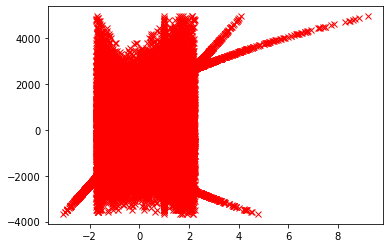

In [209]:
A = data1.drop(data1.columns[[0]], axis=1) 
B = data2.drop(data1.columns[[0]], axis=1)
train_data = data1.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)  #Labels of Training dataset
test_data = data2.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)   #Labels of Testing dataset
n = np.square(A)
A = np.concatenate((A, n), axis=1)

m = np.square(B)
B = np.concatenate((B, m), axis=1)
mean = np.mean(A, axis=0)
std = np.std(A, axis=0)
train_f = (A - mean)/std
train_f                     #Normalized features of training set

mean_test = np.mean(B, axis=0)
std = np.std(B, axis=0)
test_f = (B - mean_test)/std
test_f                     #Normalized features of testing set
#Adding column of ones before all the Features
train_f = np.vstack((np.ones((train_f.shape[0], )), train_f.T)).T
test_f = np.vstack((np.ones((test_f.shape[0], )), test_f.T)).T
def PolynomialRegression(X, Y, lr, iter):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iter):        
        y_p = np.dot(X, theta)
        
        #Cost Function
        cost = (1/(2*m))*np.sum(np.square(y_p - Y))
        
        #Gradient Descent
        d_theta = (np.dot(X.T, y_p - Y))*(1/m)
        theta = theta - lr*d_theta
        
        cost_list.append(cost)
        if (i%(iter/10) == 0):
            print("Cost is :", cost)
        
    return theta, cost_list
iter = 100
lr = 0.05
theta, cost_list = PolynomialRegression(test_f, Y_test, lr = lr, iter = iter)
plt.plot(test_f, Y_test, 'rx')
y_p = np.dot(test_f, theta)
y_p = np.dot(test_f, theta)
error = (1/test_f.shape[0])*(np.sum(np.abs(y_p - Y_test)))
print(error)
m = Y_test.size
rmse = np.sqrt(np.sum(np.square(y_p - Y_test))/m)
print(rmse)

r2_score(Y_test, y_p)


In [207]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>